In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
dataFrame = pd.read_csv('./DataSets/Final DataSet.csv')

## Exploratory Data Analysis (EDA)

Finding No of Booking for each hotel

In [34]:
dataFrame['hotel'].value_counts()

City Hotel      53422
Resort Hotel    33522
Name: hotel, dtype: int64

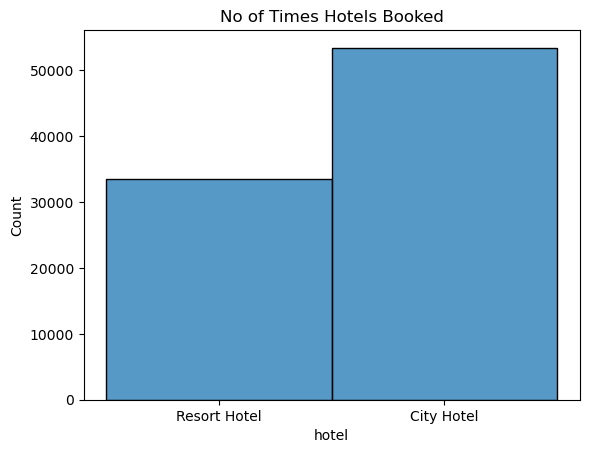

In [35]:
sns.histplot(dataFrame['hotel'])
plt.title('No of Times Hotels Booked')
plt.show()

Total Numbers of Adults, Babies, Childern Comes in Each Hotel.

In [36]:
adults = pd.DataFrame(dataFrame.groupby('hotel')['adults'].sum())
children = pd.DataFrame(dataFrame.groupby('hotel')['children'].sum())
babies = pd.DataFrame(dataFrame.groupby('hotel')['babies'].sum())

final_Transpose = pd.concat([adults, children, babies], ignore_index=False, axis=1).T
final_Transpose.reset_index(inplace=True)
final_Transpose.rename(columns = {'index':'Category'}, inplace=True)
final_Transpose

hotel,Category,City Hotel,Resort Hotel
0,adults,100244.0,63084.0
1,children,7044.0,5059.0
2,babies,392.0,550.0


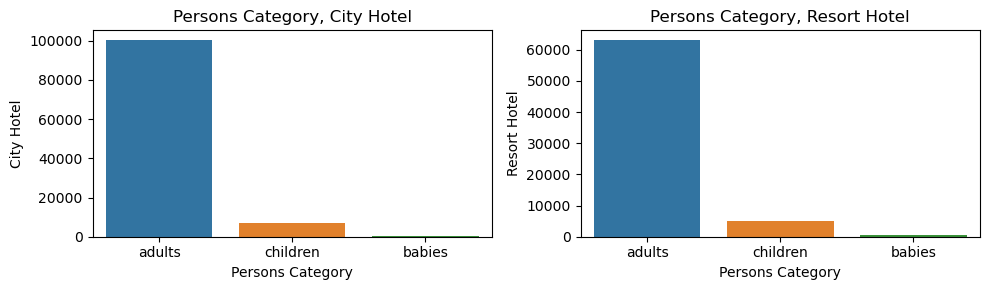

In [37]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
sns.barplot(x="Category", y="City Hotel", data=final_Transpose)
plt.title("Persons Category, City Hotel")
plt.xlabel("Persons Category")

plt.subplot(1,2,2)
sns.barplot(x="Category", y="Resort Hotel", data=final_Transpose)
plt.title("Persons Category, Resort Hotel")
plt.xlabel("Persons Category")

plt.tight_layout()
plt.show()

How many customers Arrived in each years (2015, 2016, 2017) accoring to each hotel

In [38]:
dataFrame['Total People'] = dataFrame['adults'] + dataFrame['children'] + dataFrame['babies']

In [39]:
dataFrame['Total People'].value_counts()

2.0     56917
1.0     15783
3.0     10063
4.0      3867
0.0       161
5.0       136
26.0        5
12.0        2
27.0        2
20.0        2
10.0        2
40.0        1
50.0        1
55.0        1
6.0         1
Name: Total People, dtype: int64

In [40]:
yearStats = pd.DataFrame(dataFrame.groupby('arrival_date_year')['Total People'].sum()).reset_index()

yearStats

,arrival_date_year,Total People
0,2015,25808.0
1,2016,85057.0
2,2017,65508.0


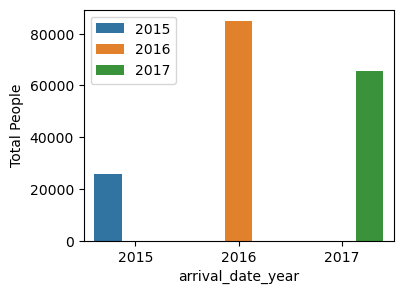

In [41]:
plt.figure(figsize=(4, 3))
sns.barplot(x='arrival_date_year', y='Total People', data=yearStats, hue= 'arrival_date_year')
plt.legend(loc='upper left',)

Total No of Peoples Come with respect to each Month and Also tell with each year

In [42]:
monthStats = pd.DataFrame(dataFrame.groupby('arrival_date_month')['Total People'].sum()).reset_index()

monthStats

,arrival_date_month,Total People
0,April,16019.0
1,August,25599.0
2,December,10197.0
3,February,11774.0
4,January,8531.0
5,July,22567.0
6,June,15819.0
7,March,14271.0
8,May,16345.0
9,November,8770.0


In [43]:
stat_2015 = pd.DataFrame(dataFrame[dataFrame['arrival_date_year'] == 2015].groupby('arrival_date_month')['Total People'].sum()).reset_index()

stat_2015

,arrival_date_month,Total People
0,August,5200.0
1,December,3811.0
2,July,3547.0
3,November,2784.0
4,October,5021.0
5,September,5445.0


In [44]:
stat_2016 = pd.DataFrame(dataFrame[dataFrame['arrival_date_year'] == 2016].groupby('arrival_date_month')['Total People'].sum()).reset_index()

stat_2016

,arrival_date_month,Total People
0,April,7390.0
1,August,10298.0
2,December,6386.0
3,February,5221.0
4,January,3186.0
5,July,8732.0
6,June,7033.0
7,March,7457.0
8,May,7353.0
9,November,5986.0


In [45]:
stat_2017 = pd.DataFrame(dataFrame[dataFrame['arrival_date_year'] == 2017].groupby('arrival_date_month')['Total People'].sum()).reset_index()

stat_2017

,arrival_date_month,Total People
0,April,8629.0
1,August,10101.0
2,February,6553.0
3,January,5345.0
4,July,10288.0
5,June,8786.0
6,March,6814.0
7,May,8992.0


Visualizing the Results

<function matplotlib.pyplot.show(close=None, block=None)>

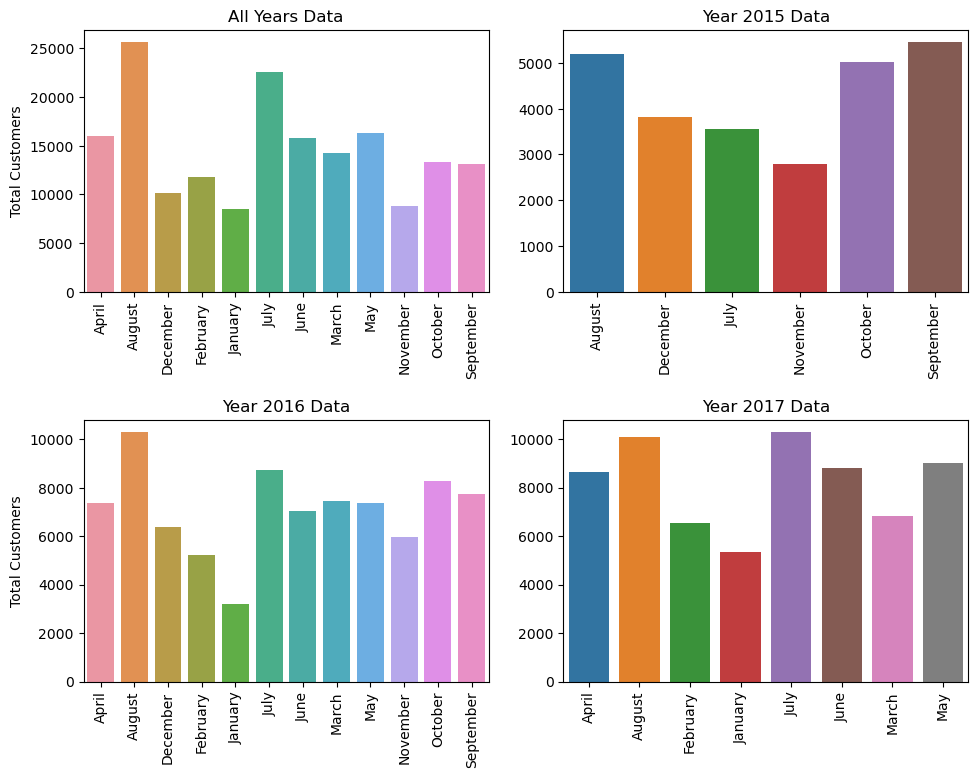

In [46]:
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
sns.barplot(x='arrival_date_month', y='Total People', data = monthStats)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Total Customers')
plt.title("All Years Data")

plt.subplot(2,2,2)
sns.barplot(x='arrival_date_month', y='Total People', data = stat_2015)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title("Year 2015 Data")


plt.subplot(2,2,3)
sns.barplot(x='arrival_date_month', y='Total People', data = stat_2016)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Total Customers')
plt.title("Year 2016 Data")

plt.subplot(2,2,4)
sns.barplot(x='arrival_date_month', y='Total People', data = stat_2017)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title("Year 2017 Data")

plt.tight_layout(pad=1.5)
plt.show

Avg days in terms of weekend, non weekend

In [47]:
dataFrame[['hotel', 'stays_in_weekend_nights']]
week_night_Stats = dataFrame.groupby('hotel')[['stays_in_weekend_nights', 'stays_in_week_nights']].mean()
week_night_Stats

,stays_in_weekend_nights,stays_in_week_nights
hotel,,
City Hotel,0.872131,2.274363
Resort Hotel,1.222928,3.193455


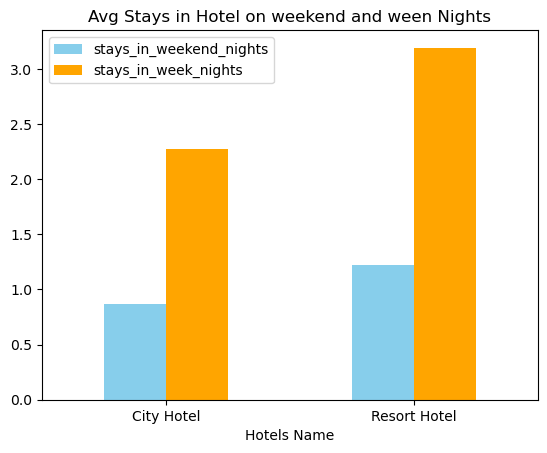

In [48]:
week_night_Stats.plot.bar(rot=0, color=['skyblue', 'orange'])
plt.title('Avg Stays in Hotel on weekend and ween Nights')
plt.xlabel("Hotels Name")
plt.show()

Hotel avg daily Rate and how it changes with respect to Month

In [49]:
CityHotel_ADR = pd.DataFrame(dataFrame[dataFrame['hotel'] == 'City Hotel'].groupby('arrival_date_month')['adr'].mean()).rename(columns={'adr':'City Hotel ADR'})

ResortHotel_ADR = pd.DataFrame(dataFrame[dataFrame['hotel'] == 'Resort Hotel'].groupby('arrival_date_month')['adr'].mean()).rename(columns={'adr':'Resort Hotel ADR'})

Hotel_ADR = pd.concat([CityHotel_ADR, ResortHotel_ADR], axis=1)

<Figure size 1400x500 with 0 Axes>

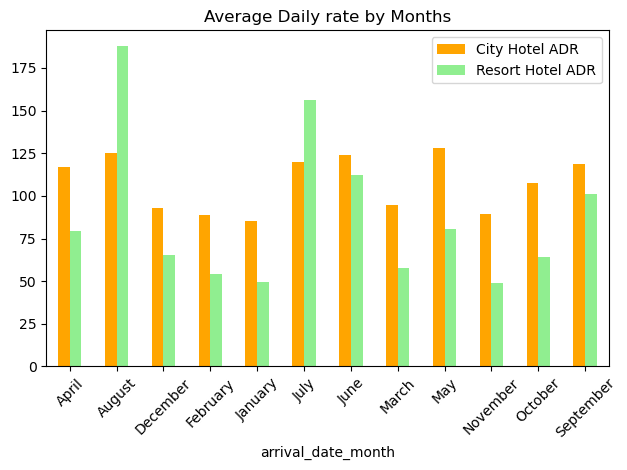

In [50]:
plt.figure(figsize=(14,5))
Hotel_ADR.plot.bar(rot=45, color=['orange', 'lightgreen'])
plt.title('Average Daily rate by Months')
plt.tight_layout()
plt.show()

Customer Type count stays in each Hotel

In [51]:
Cust_Type = pd.DataFrame(dataFrame.groupby(['hotel', 'customer_type'])['Total People'].sum())
Cust_Type

Total People
hotel        customer_type                
City Hotel   Contract               2952.0
             Group                   495.0
             Transient             92286.0
             Transient-Party       11947.0
Resort Hotel Contract               3337.0
             Group                   837.0
             Transient             56041.0
             Transient-Party        8478.0

In [52]:
one = pd.DataFrame(dataFrame[dataFrame['hotel'] == 'City Hotel'].groupby(['customer_type'])['Total People'].sum()).rename(columns={'Total People': 'City Hotel Total People'})

Two = pd.DataFrame(dataFrame[dataFrame['hotel'] == 'Resort Hotel'].groupby(['customer_type'])['Total People'].sum()).rename(columns={'Total People': 'Resort Hotel Total People'})

result = pd.concat([one, Two], axis = 1)
result


,City Hotel Total People,Resort Hotel Total People
customer_type,,
Contract,2952.0,3337.0
Group,495.0,837.0
Transient,92286.0,56041.0
Transient-Party,11947.0,8478.0


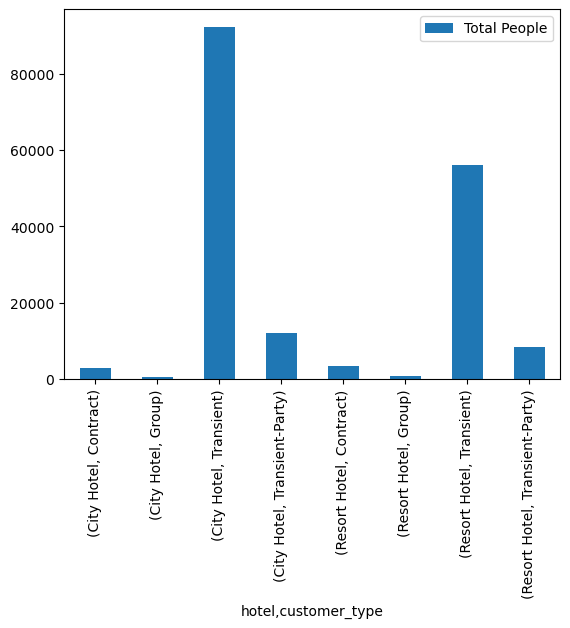

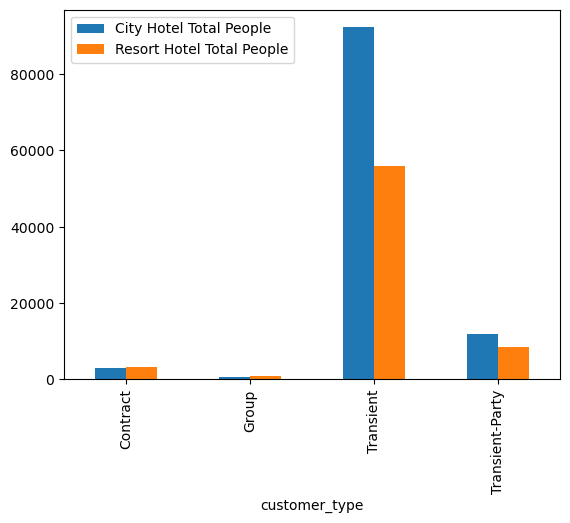

In [53]:
#plt.figure(figsize=(14,5))

#plt.subplot(2,1,1)
Cust_Type.plot.bar(rot=90)

#plt.subplot(2,1,2)
result.plot.bar(rot=90)

plt.show()

People who reserve room and get different room

In [54]:
one = pd.DataFrame(dataFrame[dataFrame['reserved_room_type'] != dataFrame['assigned_room_type']]['is_canceled'].value_counts()).rename(columns={'is_canceled':'Different canceled'})
one

,Different canceled
0,12284
1,609


In [55]:
two = pd.DataFrame(dataFrame[dataFrame['reserved_room_type'] == dataFrame['assigned_room_type']]['is_canceled'].value_counts()).rename(columns={'is_canceled':'Same Canceled'})
two

,Same Canceled
0,50669
1,23382


In [56]:
results = pd.concat([one, two], axis = 1)
results

,Different canceled,Same Canceled
0,12284,50669
1,609,23382


<Axes: >

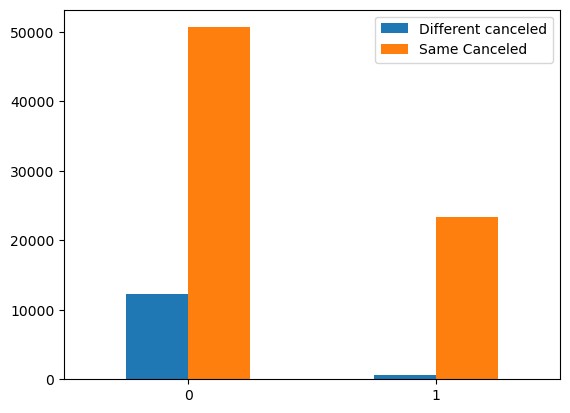

In [57]:
results.plot.bar(rot=0)

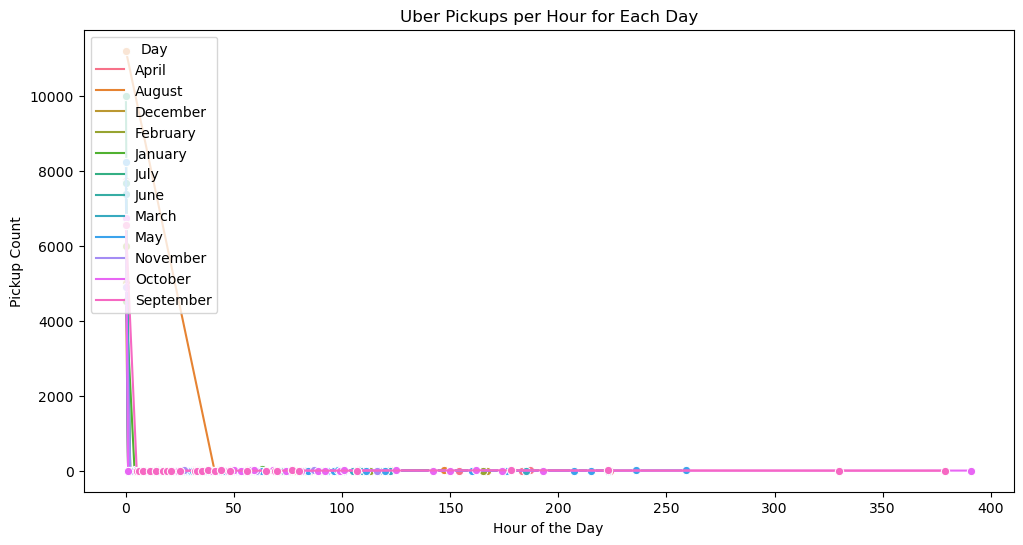

In [85]:
df_grouped = dataFrame.groupby(['arrival_date_month', 'days_in_waiting_list'])['is_canceled'].count().reset_index()
# # df_grouped.set_index('arrival_date_month', inplace=True)
# # adr_stats = dataFrame.groupby(['arrival_date_month'])['adr']..reset_index()
# # adr_stats.set_index('arrival_date_month', inplace=True)

# # result = pd.concat([adr_stats, df_grouped], axis=1).reset_index()
# # result


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='days_in_waiting_list', y='is_canceled', hue='arrival_date_month' ,marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Pickup Count')
plt.title('Uber Pickups per Hour for Each Day')
plt.legend(title='Day', loc='upper left')
plt.show()